# Python para Finanças - Análise fundamentalista de ativos

Vamos extrair os dados de uma série de ativos da bolsa brasileira e tratar esses dados gerando uma tabela para que possamos analisar os dados com Python.

Para isso, vamos utilizar a biblioteca `fundamentus` que extrai os dados do site [Fundamentus](https://www.fundamentus.com.br/index.php). Este site disponibiliza informações financeiras e fundamentalistas das empresas com ações listadas na Bovespa.

### Instalando a biblioteca e importando para o projeto

Vamos instalar a biblioteca `fundamentus` que não está nativamente no Colab para que possamos extrair os dados dos ativos. A versão que vamos utilizar aqui é a 0.2.0

In [ ]:
!pip install fundamentus==0.2.0

Agora vamos importá-la juntamente com a biblioteca de manipulação de dados `pandas`.

In [ ]:
# Importando as bibliotecas
import fundamentus
import pandas as pd

### Lendo a carteira de ativos

Com as bibliotecas importadas, vamos partir para ler os primeiros dados dos ativos de uma carteira fictícia, observando os dados gerados

In [ ]:
# Definindo a carteira de ações
carteira = ['ABEV3', 'ARZZ3', 'AZUL4', 'B3SA3', 'BRKM5', 'CIEL3', 'CMIG4', 'CPFE3', 'CPLE6', 'CRFB3',
            'CSAN3', 'CVCB3', 'CYRE3', 'EGIE3', 'ELET6', 'EMBR3', 'EZTC3', 'FLRY3', 'GGBR4', 'GOAU4',
            'HAPV3', 'HYPE3', 'JBSS3', 'KLBN11', 'MGLU3', 'MRVE3', 'PCAR3', 'PETR4', 'PRIO3', 'RECV3',
            'RENT3', 'SOMA3', 'SUZB3', 'TAEE11', 'TIMS3', 'USIM5', 'VALE3', 'VBBR3', 'VIVT3', 'WEGE3']

In [ ]:
# Criando um df com algumas infos da carteira
ind = pd.concat([fundamentus.get_papel(papel)[['Setor','Valor_de_mercado', 'Nro_Acoes', 'Receita_Liquida_12m',
                                               'Receita_Liquida_3m','Lucro_Liquido_12m', 'Lucro_Liquido_3m']] for papel in carteira])
ind.head(3)

,Setor,Valor_de_mercado,Nro_Acoes,Receita_Liquida_12m,Receita_Liquida_3m,Lucro_Liquido_12m,Lucro_Liquido_3m
ABEV3,Bebidas,177274000000,15757700000,79481400000,20276300000,14502600000,3700280000
ARZZ3,Comércio,5987860000,110989000,4893660000,1072180000,409359000,73100000
AZUL4,Transporte,3098420000,348137000,18754500000,4678410000,-2654580000,-1050290000


É importante trazer os tickers dos ativos para uma coluna para que possamos mais a frente combinar os dados que extraímos com outros dados e múltiplos dos ativos. Vamos fazer essa etapa renomeando a coluna e também alterando os tipos dos dados numéricos para o formato correto, visto que a função `get_papel()` importa todos os dados como texto.

In [ ]:
# Passando o ticker para uma coluna
ind = ind.reset_index()
ind.rename(columns={"index":"Ativo"}, inplace=True)

# Alterando colunas object para numeric
colunas = ['Valor_de_mercado', 'Nro_Acoes', 'Receita_Liquida_12m', 'Receita_Liquida_3m', 'Lucro_Liquido_12m', 'Lucro_Liquido_3m']
ind[colunas] = ind[colunas].apply(pd.to_numeric, errors='coerce', axis=1)
ind.head()

,Ativo,Setor,Valor_de_mercado,Nro_Acoes,Receita_Liquida_12m,Receita_Liquida_3m,Lucro_Liquido_12m,Lucro_Liquido_3m
0,ABEV3,Bebidas,177274000000,15757700000,79481400000,20276300000,14502600000,3700280000
1,ARZZ3,Comércio,5987860000,110989000,4893660000,1072180000,409359000,73100000
2,AZUL4,Transporte,3098420000,348137000,18754500000,4678410000,-2654580000,-1050290000
3,B3SA3,Serviços Financeiros Diversos,58903800000,5546500000,9927090000,2466320000,3992160000,949583000
4,BRKM5,Químicos,14700500000,797208000,69043000000,17920000000,-6108440000,-1345000000


### Adicionando mais dados à carteira

Pronto! Conseguimos ajustar a primeira parte dos dados. Agora vamos extrair os outros dados que vão agregar ainda mais em nossas análises. Para isso vamos criar um novo DataFrame agora usando a função `get_resultado_raw()` e extraindo apenas os dados dos ativos que definimos na carteira.

Além disso, vamos renomear a coluna do papel para Ativo.

In [ ]:
# Criando um novo df com alguns indicadores da carteira
ind_2 = fundamentus.get_resultado_raw().reset_index()
ind_2 = ind_2.query("papel in @carteira")

ind_2.rename(columns={'papel': 'Ativo'}, inplace=True)
ind_2.head()

Multiples,Ativo,Cotação,P/L,P/VP,PSR,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,...,EV/EBITDA,Mrg Ebit,Mrg. Líq.,Liq. Corr.,ROIC,ROE,Liq.2meses,Patrim. Líq,Dív.Brut/ Patrim.,Cresc. Rec.5a
3,ABEV3,11.25,12.22,2.05,2.230,0.0649,1.325,-748.58,10.50,-15.07,...,7.27,0.2124,0.1880,0.99,0.1690,0.1675,367212000.0,8.659430e+10,0.04,0.1160
60,ARZZ3,53.95,14.63,2.04,1.224,0.0201,1.046,7.44,11.54,-66.94,...,8.64,0.1060,0.0831,1.43,0.1157,0.1392,100056000.0,2.940190e+09,0.37,0.3617
74,AZUL4,8.90,-1.17,-0.14,0.165,0.0000,0.148,-0.32,1.16,-0.08,...,5.73,0.1423,-0.1415,0.34,0.1550,0.1187,118099000.0,-2.236840e+10,-1.23,0.2496
75,B3SA3,10.62,14.75,2.96,5.934,0.0400,1.220,6.61,11.37,-5.92,...,8.91,0.5219,0.4022,1.93,0.1668,0.2009,468592000.0,1.987500e+10,0.71,0.0742
164,BRKM5,18.44,-2.41,4.77,0.213,0.0000,0.157,1.28,-9.46,-0.27,...,10.74,-0.0225,-0.0945,1.44,-0.0257,-1.9813,42886200.0,3.083000e+09,13.85,0.0866


Agora, vamos concatenar as duas tabelas em uma só usando como chave a coluna Ativo.

Além disso, vamos criar mais 2 indicadores LPA (Lucro por Ação) e VPA (Valor Patrimonial por Ação) que são indicadores importantes para uma série de análises.

In [ ]:
# Concatenando os dfs em um só com as infos e indicadores
indicadores = pd.merge(ind, ind_2, on="Ativo")

# Criando uma coluna para LPA (Lucro por Ação) e VPA (Valor Patrimonial por ação)
# para calcular a fórmula de Graham  Valor intrínseco de uma ação (VI = √22,5 x LPA x VPA)
indicadores["LPA"] = (indicadores["Lucro_Liquido_12m"] / indicadores["Nro_Acoes"]).round(2)
indicadores["VPA"] = (indicadores["Patrim. Líq"] / indicadores["Nro_Acoes"]).round(2)
indicadores.head()

,Ativo,Setor,Valor_de_mercado,Nro_Acoes,Receita_Liquida_12m,Receita_Liquida_3m,Lucro_Liquido_12m,Lucro_Liquido_3m,Cotação,P/L,...,Mrg. Líq.,Liq. Corr.,ROIC,ROE,Liq.2meses,Patrim. Líq,Dív.Brut/ Patrim.,Cresc. Rec.5a,LPA,VPA
0,ABEV3,Bebidas,177274000000,15757700000,79481400000,20276300000,14502600000,3700280000,11.25,12.22,...,0.1880,0.99,0.1690,0.1675,367212000.0,8.659430e+10,0.04,0.1160,0.92,5.50
1,ARZZ3,Comércio,5987860000,110989000,4893660000,1072180000,409359000,73100000,53.95,14.63,...,0.0831,1.43,0.1157,0.1392,100056000.0,2.940190e+09,0.37,0.3617,3.69,26.49
2,AZUL4,Transporte,3098420000,348137000,18754500000,4678410000,-2654580000,-1050290000,8.90,-1.17,...,-0.1415,0.34,0.1550,0.1187,118099000.0,-2.236840e+10,-1.23,0.2496,-7.63,-64.25
3,B3SA3,Serviços Financeiros Diversos,58903800000,5546500000,9927090000,2466320000,3992160000,949583000,10.62,14.75,...,0.4022,1.93,0.1668,0.2009,468592000.0,1.987500e+10,0.71,0.0742,0.72,3.58
4,BRKM5,Químicos,14700500000,797208000,69043000000,17920000000,-6108440000,-1345000000,18.44,-2.41,...,-0.0945,1.44,-0.0257,-1.9813,42886200.0,3.083000e+09,13.85,0.0866,-7.66,3.87


### Visualizando os dados da carteira

Agora que já possuímos a nossa carteira consolidada com alguns dados fundamentalistas, vamos realizar alguns testes em nossa tabela, utilizando filtros, agrupando e visualizando os dados.

Vamos observar quais os setores e quantos ativos de cada possuímos?

In [ ]:
indicadores["Setor"].value_counts()

Setor
Energia Elétrica                            6
Petróleo, Gás e Biocombustíveis             5
Construção Civil                            3
Comércio e Distribuição                     3
Comércio                                    3
Siderurgia e Metalurgia                     3
Serviços Financeiros Diversos               2
Telecomunicações                            2
Madeira e Papel                             2
Serv.Méd.Hospit. Análises e Diagnósticos    2
Alimentos Processados                       1
Mineração                                   1
Diversos                                    1
Bebidas                                     1
Material de Transporte                      1
Viagens e Lazer                             1
Químicos                                    1
Transporte                                  1
Máquinas e Equipamentos                     1
Name: count, dtype: int64

Conseguimos observar que a maioria dos ativos são do Setor Elétrico. Que tal a gente agrupar esses dados e observar quais são esses ativos ordenando pelo Valor de Mercado?

#### Filtrando pelo setor e ordenando valores

In [ ]:
setor_eletrico = indicadores.query("Setor == 'Energia Elétrica'").sort_values(by="Valor_de_mercado", ascending=False)
setor_eletrico

,Ativo,Setor,Valor_de_mercado,Nro_Acoes,Receita_Liquida_12m,Receita_Liquida_3m,Lucro_Liquido_12m,Lucro_Liquido_3m,Cotação,P/L,...,Mrg. Líq.,Liq. Corr.,ROIC,ROE,Liq.2meses,Patrim. Líq,Dív.Brut/ Patrim.,Cresc. Rec.5a,LPA,VPA
14,ELET6,Energia Elétrica,98582400000,2307100000,36667300000,8718270000,4389210000,328051000,42.73,22.46,...,0.1178,1.57,0.0413,0.0390,63656900.0,1.125820e+11,0.54,0.0661,1.90,48.80
7,CPFE3,Energia Elétrica,38450700000,1152250000,40069700000,10165800000,5608460000,1675380000,33.37,6.86,...,0.1408,0.92,0.1707,0.2731,55467100.0,2.053400e+10,1.35,0.0829,4.87,17.82
13,EGIE3,Energia Elétrica,37345000000,815928000,10443500000,2609420000,4231840000,1684090000,45.77,8.82,...,0.4052,1.51,0.1351,0.3926,58851500.0,1.077880e+10,1.97,-0.0019,5.19,13.21
6,CMIG4,Energia Elétrica,30077300000,2861780000,37260700000,9057870000,5519120000,1152390000,10.51,5.45,...,0.1482,1.15,0.1464,0.2172,127268000.0,2.541460e+10,0.46,0.1107,1.93,8.88
8,CPLE6,Energia Elétrica,29828100000,2982810000,21365800000,5417000000,2163600000,531383000,10.00,13.79,...,0.1041,1.39,0.0740,0.0886,130807000.0,2.441760e+10,0.62,0.0654,0.73,8.19
33,TAEE11,Energia Elétrica,11950700000,1033500000,3400520000,731321000,1119770000,374027000,34.69,10.67,...,0.3293,1.26,0.1040,0.1587,65615800.0,7.056880e+09,1.38,0.0529,1.08,6.83


#### Filtrando por valor de um indicador

Conseguimos filtrar os dados utilizando uma variável categórica. Vamos agora fazer esse processo para um indicador (variável numérica).

In [ ]:
maiores_ROE = indicadores[["Ativo","ROE"]].sort_values(by="ROE", ascending=False)
maiores_ROE["ROE"] = maiores_ROE["ROE"] * 100
maiores_ROE = maiores_ROE.query("ROE > 20")
maiores_ROE

,Ativo,ROE
13,EGIE3,39.26
37,VBBR3,33.06
39,WEGE3,33.05
28,PRIO3,32.89
7,CPFE3,27.31
27,PETR4,27.02
6,CMIG4,21.72
36,VALE3,20.68
32,SUZB3,20.33
3,B3SA3,20.09


#### Filtrando por mais indicadores e adicionando uma coluna calculada

Vamos subir mais um degrau na filtragem de dados. Agora vamos filtrar não apenas por uma, mas por mais variáveis, cada uma com um valor específico para ela.

Para isso, vamos criar uma tabela que recebe apenas os ativos que possuem P/L (Preço sobre Lucro) menor ou igual a 15 e P/VP (Preço pelo Valor Patrimonial) menor ou igual a 1.5. E, além disso, vamos gerar uma coluna chamada Valor Intrínseco que é dada pela seguinte fórmula:

$$Valor Intrínseco = \sqrt(22.5 * LPA * VPA)$$

In [ ]:
import numpy as np

carteira = indicadores[["Ativo", "P/L", "P/VP", "VPA", "LPA"]]
carteira  = carteira.query("`P/L` <= 15 and `P/VP` <= 1.5 and VPA > 0 and LPA > 0").reset_index(drop=True)
carteira["Valor_Intrínseco"] = np.sqrt(22.5 * carteira["LPA"] * carteira["VPA"]).round(2)
carteira

,Ativo,P/L,P/VP,VPA,LPA,Valor_Intrínseco
0,CIEL3,7.23,1.28,4.48,0.79,8.92
1,CMIG4,5.45,1.18,8.88,1.93,19.64
2,CPLE6,13.79,1.22,8.19,0.73,11.60
3,CSAN3,14.61,1.28,11.03,0.96,15.44
4,CYRE3,7.66,1.00,19.98,2.62,34.32
5,EZTC3,12.02,0.65,21.28,1.15,23.47
6,GGBR4,5.96,0.73,24.62,3.01,40.83
7,GOAU4,5.06,0.62,17.13,2.08,28.31
8,PETR4,4.55,1.23,31.25,8.44,77.03
9,RECV3,9.79,1.30,15.85,2.11,27.43


#### Visualizando dados graficamente

Para finalizar, vamos gerar um gráfico simples com os 10 maiores DY da tabela que geramos `indicadores`.

Para isso, vamos filtrar esses dados, gerando uma nova tabela e representá-los por meio de um gráfico de barras

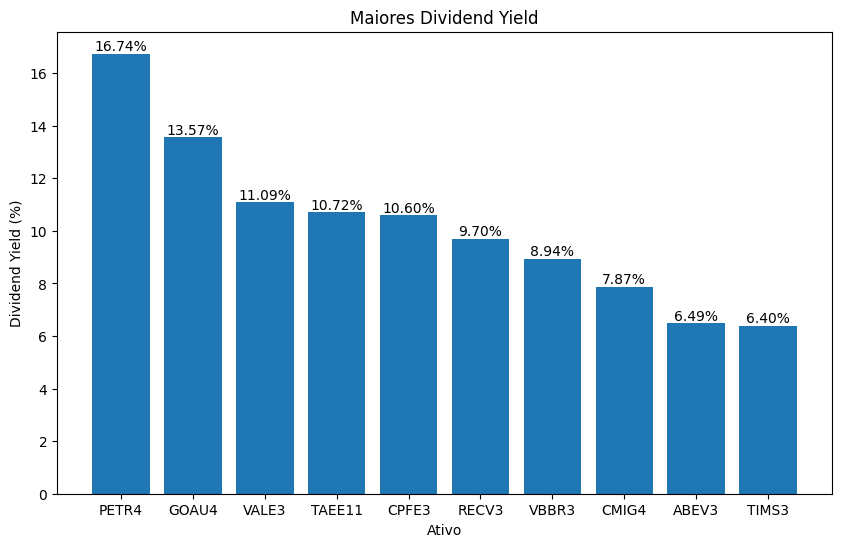

In [ ]:
import matplotlib.pyplot as plt

maiores_DY = indicadores[["Ativo","Div.Yield"]].sort_values(by="Div.Yield", ascending=False).head(10)
maiores_DY["Div.Yield"] = maiores_DY["Div.Yield"] * 100

plt.figure(figsize=(10, 6))
plt.bar(maiores_DY["Ativo"], maiores_DY["Div.Yield"])
plt.title("Maiores Dividend Yield")
plt.xlabel("Ativo")
plt.ylabel("Dividend Yield (%)")

for i, v in enumerate(maiores_DY["Div.Yield"]):
    plt.text(i, v, f'{v:.2f}%', ha='center', va='bottom')

plt.show()